#                                       *Climate* *Change* *Sentiment* *Analysis*



---











Add a theme image


***Table of Contents***

Introduction

Data Overview

Installed Libraries

Import Libraries 

1. Importing and viewing the Datasets

2. Basic Data Analysis
  

3. Preprocessing
  
  *Create copy
  
  *Cleaning the data 

4. Explanatory Data Analysis

 
  * Find Entities
  * Lemmatization
  * Sentiment distribution
  * Tweet distribution
  * Climate change popular words
  * Climate change popular hashtags
  * Climate change popular named entities
  * News bulletins
  * People and places

5. Machine Learning

  5.1. Train-validation split

  5.2. Train models

6. Model evaluation

  6.1. Modeling

  * Model #1 

  * Model #2

  * Model #3

  * Model #4

  * Model #5

  6.2. Model Selection

  * Models score comparison

  * Hyperparameter tuning

  6.3. Model Improvement(If any)

Submission

Conclusion

Acknowledgements

#**Introduction**

It is undeniable that climate change is one of the most talked topics of our times and one of the biggest challenges the world is facing today. In the past few years, we have seen a steep rise on the Earth's temperature, causing a spike in wild fires, drought, rise of sea levels due to melting glaciers, rainfall pattern shifts, flood disasters. 

While this may be true to most around the world, for one or many reasons, there are still some who are yet unphased or better yet indenial of dangers imposed by climate channge. With that being said, it is of a compelling matter to the public and its governments to engage in such a dialogue. 

Here is a document tasked to share an insight on the global climate change discussion based on data collected from Twitter. In this document we will perform a sentiment on climate change analysis to help draw an idea of what pun=blic thinks through the use of data computation and machine learning.

See below for more discription on the data and outline of this file.

*   **Data overview**


> The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.



*   **Outline**

> In this document we will perform data analysis, build a machine learning classifier model that will be used to predict tweet sentiments based on tweets using Python programming language. 

> The following list sums up the outline of this document:
*  Basic data analysis
* Clean data
* Perform an explanatory data analysis
* Tokenize and lemmatize cleaned data
* Build models
* Perform hyperparameter tuning
* Resample data
* Perform predictions on unseen data

> It is also important to not that a Streamlit App based on this model will be built. The app will facilitate as a user-friendly plartform for users to perform sentiment predictions based on tweets and use as an on-hand climate change informative tool for users.

#**Install NLP Libraries**

The following special libraries were installed:

**spacy** is designed specifically for production use and helps build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

The **Natural Language Toolkit** is a suite of libraries and programs for symbolic and statistical natural language processing (NLP) for English written in the Python programming language.

In [ ]:
!pip install spacy
!pip install NLTK
!pip install comet_ml

#**Importing the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import time

%matplotlib inline

from numpy import arange
import re           # "re", regular expression module included with Python primarily used for string searching and manipulation
                    # Also used frequently for web page "Scraping" (extract large amount of data from websites)
import os
import re, string
import spacy.cli
import nltk         # The Natural Language Toolkit

#Language libraries for text cleaning
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

nlp = spacy.load('en_core_web_sm')

from wordcloud import WordCloud 

#Resampling libraries
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#Machine Learning Models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  KFold

#Matrix measurement
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
#from sklearn.metrics import recall_score, precision_recall_curve,
from collections import defaultdict


In [ ]:
nltk.download('words')
spacy.cli.download('en_core_web_sm')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



In [5]:
stop = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())

#**1. Data sets**

*   **Importing datasets**

In [7]:
# Importing test datasets
test = pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/advanced_classification_zm6_project/main/data/test_with_no_labels.csv')
# Importing train datasets
train= pd.read_csv('https://raw.githubusercontent.com/ThobaniMwandla/advanced_classification_zm6_project/main/data/train.csv')

*   **View datasets**

> View the first five rows of the train data.

In [8]:
# View train data
train.head(5)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954




> As displayed above, this data contains a lot of noise. The hashtags, @-metions, uppercase, numbers, etc, creates a lot of noise that might be distractive to our model. Therefore, this will need to be cleaned.



> View the first five rows of the test data.

In [9]:
# View test data
test.head(5)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928




> The same level of noise is demonstrated in the test data. Therefore, it must also be cleaned.



#**2. Preprocessing**



> Here we are preprocessing the data by first performing basic data checks such as data shape, anomalies, missing values, duplicates, datatypes, and then clean the text by removing the noise and stopwords. 

> After cleaning the data, we then tokenize and lemmatize the data text for to convert all the individual words on the text to base their base form so they can easily be grouped together and analysed as a single item.




##2.1. Data Description

* **Create copies**

> We create copies of raw data for later use on EDA. This will be used for text extractions such as hashtags and tweet handles extraction.

In [10]:
# Preserve raw data by copying for later use
eda_train = train.copy()
eda_test = test.copy()


> As shown above, there are 15,819 rows and 3 columns in the train data; And 10,546 rows and 2 columns in the test data.




*   ***Datatype check***





> Checking and exploring the DataTypes of the dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB




> As shown above, there are 15,819 rows and 3 columns (sentiment of int type, message of object type, tweetid of int type) in the train data;


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB




> And 10,546 rows and 2 columns (message of object type, tweetid of int type) in the test data.



##2.2. Data cleaning



*   ***Missing values***




> Check for missing values, if any, replace with random.


In [ ]:
print(train.isnull().sum())

sentiment    0
message      0
tweetid      0
dtype: int64


In [ ]:
print(test.isnull().sum())

message    0
tweetid    0
dtype: int64


> This confirms that there are no nulls in both the test and train datasets.



*   ***Check for duplicates***




*   ***Noise removal***

> After going through the data, it was noticed that there was noise on the 'message' column containing the tweets. 

> Therefore, the noise is removed from the tweets firstly by applying the lower-case function to all entries, and then remove urls, twitter handles with @-mentions, hashtags, white spaces, numbers and punctuation marks.





In [11]:
def clean_text(df):
  item = 0
  for tweet in df['message']:
    tweet = tweet.lower()
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.lstrip()
    tweet = tweet.rstrip()
    tweet = tweet.replace('  ', ' ')

    tweet = re.sub(r'[-]',' ', tweet)
    tweet = re.sub(r'[^\w\s]','', tweet)
    tweet = re.sub('[0-9]+', '', tweet)

    df.loc[item, 'message'] = tweet
    item += 1



> Apply the cleaning function on the train data.



In [12]:
clean_text(train)
train

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt researchers say we have three years to act ...,698562
3,1,todayinmaker wired was a pivotal year in the ...,573736
4,1,rt its and a racist sexist climate change den...,466954
...,...,...,...
15814,1,rt they took down the material on global warmi...,22001
15815,2,rt how climate change could be breaking up a m...,17856
15816,0,notiven rt nytimesworld what does trump actual...,384248
15817,-1,rt hey liberals the climate change crap is a h...,819732


> Apply the cleaning function on the test data.


In [13]:
clean_text(test)
test

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,the scary unimpeachable evidence that climate ...,224985
3,putin got to you too jill \ntrump doesnt belie...,476263
4,rt female orgasms cause global warming\nsarcas...,872928
...,...,...
10541,rt brb writing a poem about climate change cli...,895714
10542,the year climate change came home during the ...,875167
10543,rt pacific countries positive about fiji leadi...,78329
10544,rt youre so hot you must be the cause for glob...,867455



*   ***Stopwords removal***

> Stopwords are the English words which do not contribute much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have, is, they, are stopwords.

>Stopwords removal is very important when dealing with Natural Processing Language or text classification problems especially where the text is to be classified to certain categories, in this case, sentiments. 

> Hence, stopwords are excluded from the tweets in the 'messge' column so that more focus can be given to those words which define the meaning of the tweet.

In [14]:
def remove_stopwords(df):
    new_stopwords = stopwords.words('english')
    row = 0
    for tweet in df['message']:
      tweet = word_tokenize(tweet)
      tweet = [word for word in tweet if not word in new_stopwords]
      tweet = ' '.join(tweet)

      df.loc[row, 'message'] = tweet
      row += 1

    return df

> Remove stopwords from train data.

In [15]:
remove_stopwords(train)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt racist sexist climate change denying bigot ...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking millionyearol...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


> Stopwords removed from test data.

In [16]:
remove_stopwords(test)

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,year climate change came home hottest year rec...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


> As shown on the datframe above, words like 'is', 'are' have now been ommitted from the datasets.

*   ***Word Normalization***

> Above as mentioned, we sre more driving by the idea that more focus should be given to those words which define the meaning of the tweet for the model to be able to train more effectively.

> This brings us to what is referred to as word or text normalization. Text normalization allows us to not only reduce words to their base form but also group words of the same meaning according to the given context. This helps sharpens the classifier even more in effectively recognizing not only the context of text but also patterns, effectively improving its ability to classify categories. For example, lemmatization of of the word 'better' will output the word 'good', which helps the classifier not see the word 'better' as a different 'thing' from the word 'good', and this is one of the ways machines 'understand' English, or language.

> Here we used the Spacy 'en_core_web_sm' package to lemmatize each and every tweet by iterating through the tokenized rows in the 'message' column.

In [25]:
def lemmatize_tweet(df):
    df_index = 0

    for tweet in df['message']:
      tweet = nlp(tweet)
      
      for token in tweet:
        df.loc[df_index, 'message'] = df.loc[df_index, 'message'].replace(str(token.text), str(token.lemma_))

      df_index += 1

      return df

In [26]:
lemmatize_tweet(train)

,sentiment,message,tweetid
0,1,polyscimajor epa chief donot think carbon diox...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt racist sexist climate change denying bigot ...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking millionyearol...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [27]:
lemmatize_tweet(test)

,message,tweetid
0,europe look china make sure alone fight climat...,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,year climate change came home hottest year rec...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455




*   **Named entities**



> Similarly to word normalization, here we also attempt to convert words of named entities such as names of places and names of organisations, for example, to represantative or place-holder terms, such as 'LOC' and 'ORG', respectively, in this case. This further reduces noise for the classifier to effectively learn and recognise patterns. 

> We used the Spacy package to identify and replace entities in each and every tweet in the 'message' column.

In [30]:
def entities(df):
    indx = 0

    for tweet in df['message']:
      tweet = nlp(tweet)

      for entity in tweet.ents:
        df.loc[indx, 'message'] = df.loc[indx, 'message'].replace(str(entity.text), str(entity.label_))

      indx += 1

      return df

In [31]:
entities(train)

,sentiment,message,tweetid
0,1,ORG chief donot think carbon dioxide main caus...,625221
1,1,like lack evidence anthropogenic global warming,126103
2,2,rt researchers say three years act climate cha...,698562
3,1,todayinmaker wired pivotal year war climate ch...,573736
4,1,rt racist sexist climate change denying bigot ...,466954
...,...,...,...
15814,1,rt took material global warming lgbt rights he...,22001
15815,2,rt climate change could breaking millionyearol...,17856
15816,0,notiven rt nytimesworld trump actually believe...,384248
15817,-1,rt hey liberals climate change crap hoax ties ...,819732


In [32]:
entities(test)

,message,tweetid
0,LOC look GPE make sure alone fight climate change,169760
1,combine polling staffers climate change womens...,35326
2,scary unimpeachable evidence climate change al...,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,rt female orgasms cause global warming sarcast...,872928
...,...,...
10541,rt brb writing poem climate change climatechan...,895714
10542,year climate change came home hottest year rec...,875167
10543,rt pacific countries positive fiji leading glo...,78329
10544,rt youre hot must cause global warming aldubla...,867455


##**2.3. Visualize Distributions**

* **Tweet distribution**

>The tweets are divided into 4 sentiments/classes:

>[ 0 ] Neutral : Tweets that neither support nor refuse beliefs of climate change.

>[-1 ] Anti : Tweets that do not support the belief of man-made climate change.

>[ 1 ] Pro : Tweets that support the belief of man-made climate change

>[ 2 ] News : Tweets linked to factual news about climate change.

In [33]:
def update(df):
    sentiment = df['sentiment']
    word_sentiment = []

    for i in sentiment :
        if i == 1 :
            word_sentiment.append('Pro')
        elif i == 0 :
            word_sentiment.append('Neutral')
        elif i == -1 :
            word_sentiment.append('Anti')
        else :
            word_sentiment.append('News')

    df['sentiment'] = word_sentiment
    
    return (df)

In [34]:
eda_train = update(eda_train)
eda_train.head()

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [35]:
eda_train.sentiment.value_counts()

Pro        8530
News       3640
Neutral    2353
Anti       1296
Name: sentiment, dtype: int64

In [36]:
import matplotlib.style as style 
sns.set(font_scale=1.5)
#style.use('seaborn-pastel')
#style.use('seaborn-poster')

In [37]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


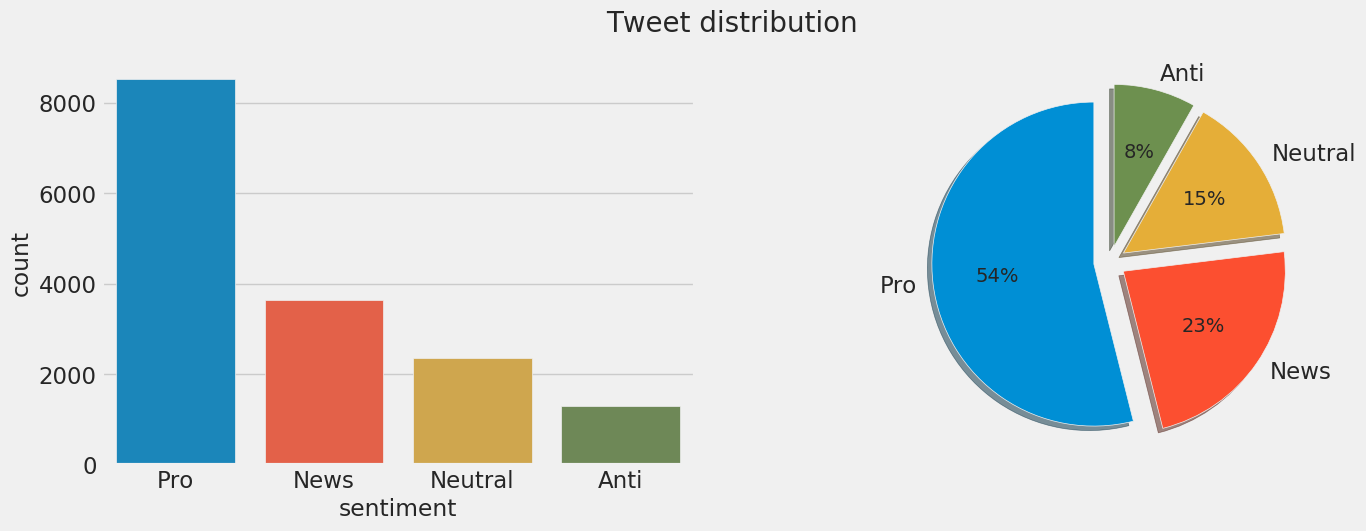

In [40]:
style.use('fivethirtyeight')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(15, 5), 
                         dpi=100)

sns.countplot(eda_train['sentiment'], ax=axes[0])

labels=['Pro', 'News', 'Neutral', 'Anti'] 

axes[1].pie(eda_train['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1))

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

The bar graph indicates that [1] which is the Pro sentiment the largest count of tweets and [-1] which is Anti has the lowest count of tweets.

* **Popular words distribution**

Demonstration of words used in different tweets under each class/sentiment.





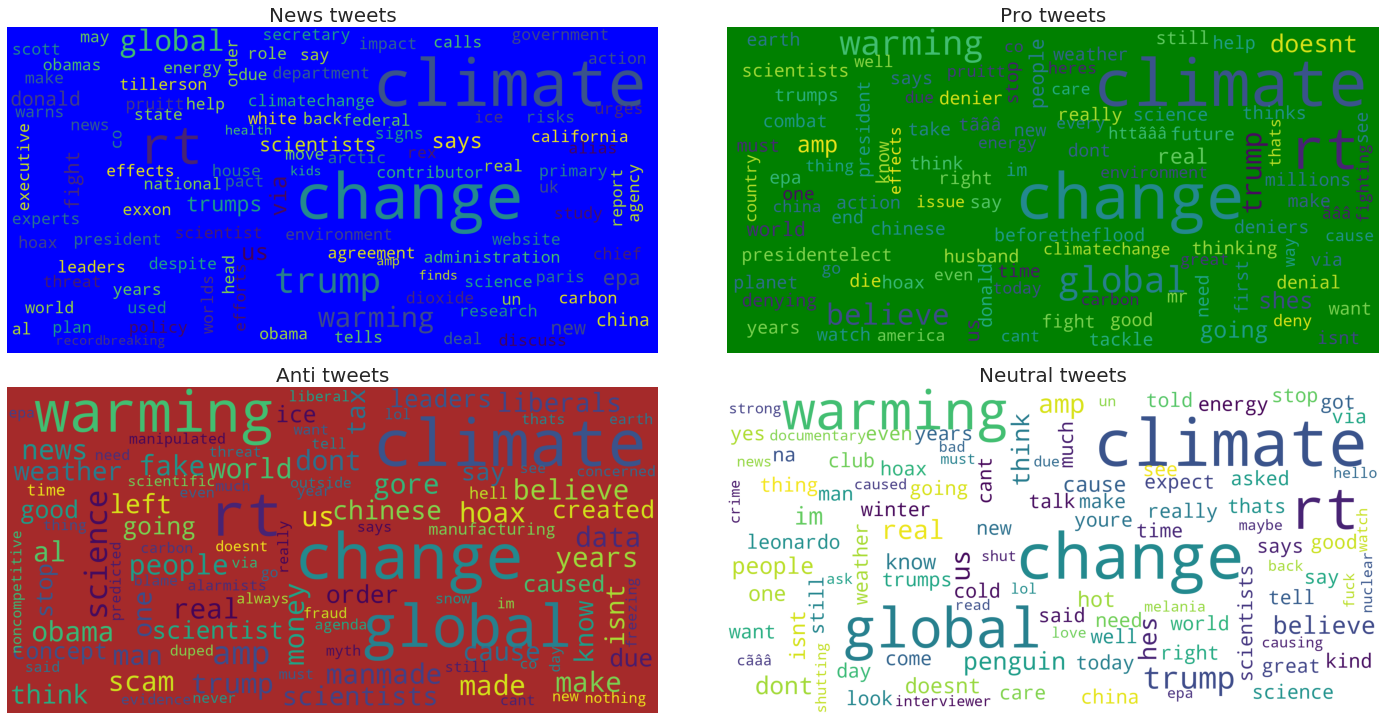

In [39]:
#word clouds
news = train[train['sentiment'] == 2]['message']
pro = train[train['sentiment'] == 1]['message']
neutral =train[train['sentiment'] == 0]['message']
Anti = train[train['sentiment'] ==-1]['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
Anti= [word for line in Anti for word in line.split()]

news = WordCloud(
    background_color='blue',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='green',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='white',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


Anti = WordCloud(
    background_color='brown',
    max_words=100,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(Anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 10))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('News tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Pro tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(Anti)
axs[1, 0].set_title('Anti tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Neutral tweets', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

Observations:

1.The most common words used are Global, Climate, Warming,Chnage and rt(which means retweet).

2.The word 'Trump' is a frequently occuring word in all 4 classes. 

3.Words like 'science' and 'scientist' occur frequently as well which could imply that people are tweeting about scientific studies that support their views on climate change.

* **Popular hashtags distribution**

Hashtags are a tool which twittwer uses to orgainize tweets according to their specific categories

In [41]:
def hashtag_extract(tweet):   
    hashtags = []
    
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        
    hashtags = sum(hashtags, [])
    frequency = nltk.FreqDist(hashtags)
    
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                       'count': list(frequency.values())})
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

# Extracting the hashtags from tweets in each class
pro = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'Pro'])
anti = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'Anti'])
neutral = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'Neutral'])
news = hashtag_extract(eda_train['message'][eda_train['sentiment'] == 'News'])

pro.head()

,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


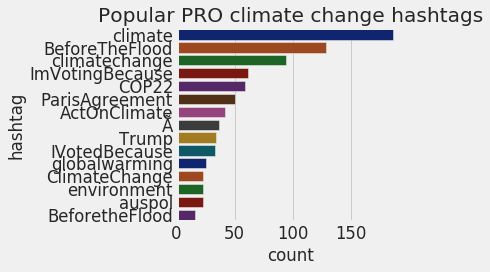

In [49]:
sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], palette=("dark"))
plt.title('Popular PRO climate change hashtags')
plt.tight_layout()

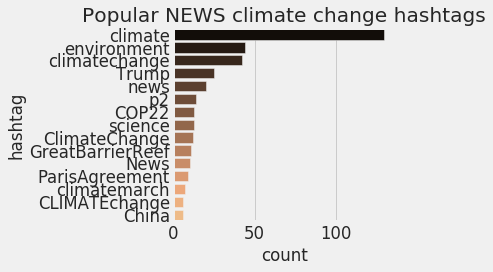

In [50]:
sns.barplot(y=news['hashtag'], x=news['count'], palette=("copper"))
plt.title('Popular NEWS climate change hashtags')
plt.tight_layout()

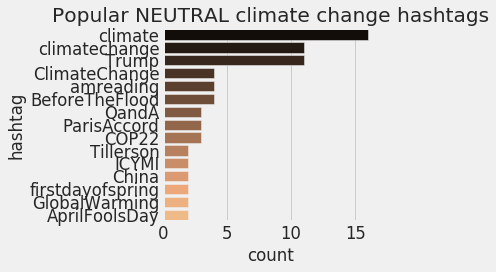

In [51]:
sns.barplot(y=neutral['hashtag'], x=neutral['count'], palette=("copper"))
plt.title('Popular NEUTRAL climate change hashtags')
plt.tight_layout()

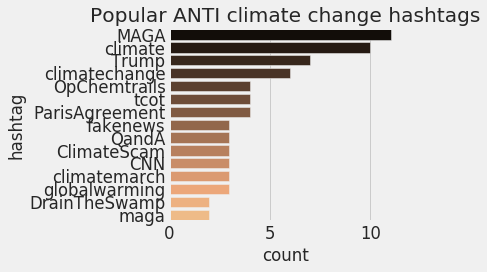

In [52]:
sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], palette=("copper"))
plt.title('Popular ANTI climate change hashtags')
plt.tight_layout()

* **Named entities distribution**

In [ ]:
#Graph of named entities


* **News channels distribution**

* **People and places**

In [ ]:
#code showing tweeters/tweeter mentions bargraphs and cloud per sentiment

#**4. Machine Learning**



> The cleaned data was fitted in a TFiD and CountVector pipeline with a unigram and bigram analysis and passed through five models and compared their performances. The best performing model was then hyperparamatised to improve its performance. In this way we were able to achieve a well optimized performing model.



##**4.1. Train-test split**

In [ ]:
X = train['message'].values
y = train['sentiment'].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=.05,
                                                  random_state=42
                                                  )

##**4.2. Train Models**



*  **Vectorizers**





In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Define multiple vectorizers to test which one gives us the best accuracy
vectorizer_dict = {'CV_1': CountVectorizer(),'TF_1': TfidfVectorizer()}



> **Models**



In [ ]:
model_dict = {'Logistic Regression': LogisticRegression(),
              'Naive Bayes': MultinomialNB(),
              'LinearSVM': SGDClassifier(),
              'Decision Tree': DecisionTreeClassifier(),
              'LinearSVC': LinearSVC(),
              'SVC': SVC()
              }

> **Models**

In [ ]:
# Run each classifier for each vectorizer
from collections import defaultdict
classifier_results_dict = defaultdict(list)
for vec_name, vectorizer in vectorizer_dict.items():
    
    X_train_v = vectorizer.fit_transform(X_train)
    X_test_v = vectorizer.transform(X_val)
    print(vec_name)           # helps keep track of run progress

    for mod_name, model in model_dict.items():

        # Logging the execution time for each model
        start_time = time.time()

        model.fit(X_train_v, y_train)
        y_pred_v = model.predict(X_test_v)

        run_time = time.time()-start_time

        precision_v = round(100*precision_score(y_val, y_pred_v,
                            average='weighted'), 4)
        recall_v = round(100*recall_score(y_val, y_pred_v,
                         average='weighted'), 4)
        f1_v = round(2*(precision_v*recall_v) / (precision_v+recall_v), 4)

        classifier_results_dict['Vectorizer Type'].append(vec_name)
        classifier_results_dict['Model Name'].append(mod_name)
        classifier_results_dict[('Precision')].append(precision_v)
        classifier_results_dict[('Recall')].append(recall_v)
        classifier_results_dict[('F1-score')].append(f1_v)
        classifier_results_dict[('Execution Time')].append(run_time)

classifier_results_df = pd.DataFrame(classifier_results_dict)

CV_1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



TF_1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#**5. Model Evaluation**

##**5.1. Model Performance**

In [ ]:
# Checking result
classifier_results_df.sort_values(by='F1-score',
                                  ascending=False).reset_index(drop=True)

,Vectorizer Type,Model Name,Precision,Recall,F1-score,Execution Time
0,TF_1,SVC,76.8198,75.2212,76.0121,49.769531
1,CV_1,SVC,75.2753,74.7155,74.9944,37.700905
2,TF_1,Logistic Regression,73.8359,74.3363,74.0853,3.977743
3,TF_1,LinearSVM,72.9599,73.5777,73.2675,0.187344
4,CV_1,LinearSVM,72.7177,73.4513,73.0827,0.319645
5,CV_1,Logistic Regression,72.2507,73.1985,72.7215,3.593830
6,TF_1,LinearSVC,71.7736,72.8192,72.2926,0.241551
7,CV_1,LinearSVC,71.9252,72.0607,71.9929,2.654682
8,TF_1,Naive Bayes,77.2010,66.6245,71.5239,0.020124
9,CV_1,Naive Bayes,71.5482,71.3021,71.4249,0.011078


##**5.2. Model Selection**

* **Models score comparison**

In [ ]:
import plotly.express as px
fig = px.bar(classifier_results_df, x="Model Name", y="F1-score", color='Vectorizer Type',
             barmode='group', height=400)
fig.show()

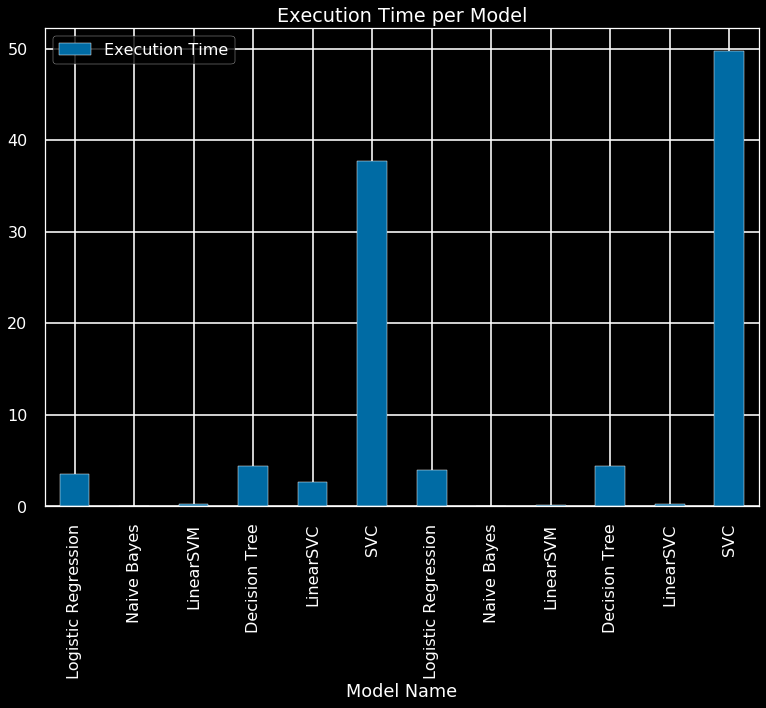

In [ ]:
ax = plt.gca()
classifier_results_df.plot(kind='bar',x='Model Name',y='Execution Time',ax=ax)
plt.title('Execution Time per Model')
plt.xticks(rotation=90)
plt.show()

* **Hyperparameter tuning of best model**

In [ ]:
X = train['message'].values
y = train['sentiment'].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=.01,
                                                  random_state=42
                                                  )

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))

Tfd_SVC_pipe = Pipeline([('vectorizer', vectorizer), ('SVC', SVC())]) 

In [ ]:
Tfd_SVC_pipe.get_params()

{'SVC': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False,
 'memory': None,
 'steps': [('vectorizer',
   TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.float64'>, encoding='utf-8',
                   input='content', lowercase=True, max_df=0.9, max_features=None,
                   min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                   smoo

In [ ]:
parameters = {'SVC__kernel':('linear', 'rbf'),
              'SVC__C':(0.25,1.0),
              'SVC__gamma': (1,2)
              }

In [ ]:

clf = GridSearchCV(Tfd_SVC_pipe, parameters)
clf.fit(X_train,y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)


In [ ]:
y_pred = clf.predict(X_val)

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.60      0.75        10
           0       0.62      0.30      0.40        27
           1       0.76      0.86      0.81        92
           2       0.67      0.80      0.73        30

    accuracy                           0.74       159
   macro avg       0.76      0.64      0.67       159
weighted avg       0.73      0.74      0.72       159



#**Results and Submission**

In [ ]:
test['sentiment'] = clf.predict(test['message'])

In [ ]:
test.drop('message', axis = 1)

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [ ]:
test[['tweetid','sentiment']].to_csv('submissionmpho.csv', index=False)

In [ ]:
submission = pd.read_csv('submissionmpho.csv')

In [ ]:
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


#**Conclusion**

Conclude on results, how the prediction performed, what can be improved or whatever you see fit

#**References**

References of sources of information (can be informal)